In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as sm

In [2]:
Riq_C = pd.read_csv("Riqueza_Comuna.csv", sep = ",", header = 0)
Riq_C.head()

,comuna,LEI,II,EI,idh,HDI
0,13101,0.791672,0.873137,0.924099,0.807,0.861222
1,13102,0.782817,0.800343,0.713499,0.743,0.764616
2,13103,0.752447,0.750382,0.657961,0.683,0.718874
3,13104,0.784872,0.760697,0.705426,0.707,0.749584
4,13105,0.777236,0.780019,0.673876,0.711,0.742015


In [3]:
def_1 = pd.read_csv('DEFUNCIONES_FUENTE_DEIS_2016_2021_29042021.csv', sep = ';', encoding = 'latin-1')

In [4]:
def_1.columns = ['ANO_DEF','FECHA_DEF','GLOSA_SEXO','EDAD_TIPO','EDAD_CANT','CODIGO_COMUNA_RESIDENCIA','GLOSA_COMUNA_RESIDENCIA','GLOSA_REG_RES','DIAG1','CAPITULO_DIAG1','GLOSA_CAPITULO_DIAG1','CODIGO_GRUPO_DIAG1','GLOSA_GRUPO_DIAG1','CODIGO_CATEGORIA_DIAG1','GLOSA_CATEGORIA_DIAG1','CODIGO_SUBCATEGORIA_DIAG1','GLOSA_SUBCATEGORIA_DIAG1','DIAG2','CAPITULO_DIAG2','GLOSA_CAPITULO_DIAG2','CODIGO_GRUPO_DIAG2','GLOSA_GRUPO_DIAG2','CODIGO_CATEGORIA_DIAG2','GLOSA_CATEGORIA_DIAG2','CODIGO_SUBCATEGORIA_DIAG2','GLOSA_SUBCATEGORIA_DIAG2']

In [5]:
print(def_1.dtypes)

ANO_DEF                       int64
FECHA_DEF                    object
GLOSA_SEXO                   object
EDAD_TIPO                     int64
EDAD_CANT                     int64
CODIGO_COMUNA_RESIDENCIA      int64
GLOSA_COMUNA_RESIDENCIA      object
GLOSA_REG_RES                object
DIAG1                        object
CAPITULO_DIAG1               object
GLOSA_CAPITULO_DIAG1         object
CODIGO_GRUPO_DIAG1           object
GLOSA_GRUPO_DIAG1            object
CODIGO_CATEGORIA_DIAG1       object
GLOSA_CATEGORIA_DIAG1        object
CODIGO_SUBCATEGORIA_DIAG1    object
GLOSA_SUBCATEGORIA_DIAG1     object
DIAG2                        object
CAPITULO_DIAG2               object
GLOSA_CAPITULO_DIAG2         object
CODIGO_GRUPO_DIAG2           object
GLOSA_GRUPO_DIAG2            object
CODIGO_CATEGORIA_DIAG2       object
GLOSA_CATEGORIA_DIAG2        object
CODIGO_SUBCATEGORIA_DIAG2    object
GLOSA_SUBCATEGORIA_DIAG2     object
dtype: object


In [6]:
def_1.insert(2, 'SEMANA', 0)
def_1['FECHA_DEF'] = pd.to_datetime(def_1['FECHA_DEF'])
def_1['SEMANA'] = def_1['FECHA_DEF'].dt.week
def_1 = def_1[def_1.ANO_DEF.isin([2020, 2021])]
def_1_RM = def_1[def_1['GLOSA_REG_RES'] == 'Metropolitana de Santiago']
def_1_RM_COVID = def_1_RM[def_1_RM.GLOSA_SUBCATEGORIA_DIAG1.isin(['COVID-19 virus identificado', 'COVID-19 virus no identificado'])]

In [7]:
def_1_RM_COVID = def_1_RM_COVID.sort_values('FECHA_DEF')
def_1_RM_COVID1 = def_1_RM_COVID[13776:]
def_1_RM_COVID1.head()

,ANO_DEF,FECHA_DEF,SEMANA,GLOSA_SEXO,EDAD_TIPO,EDAD_CANT,CODIGO_COMUNA_RESIDENCIA,GLOSA_COMUNA_RESIDENCIA,GLOSA_REG_RES,DIAG1,...,GLOSA_SUBCATEGORIA_DIAG1,DIAG2,CAPITULO_DIAG2,GLOSA_CAPITULO_DIAG2,CODIGO_GRUPO_DIAG2,GLOSA_GRUPO_DIAG2,CODIGO_CATEGORIA_DIAG2,GLOSA_CATEGORIA_DIAG2,CODIGO_SUBCATEGORIA_DIAG2,GLOSA_SUBCATEGORIA_DIAG2
123863,2020,2020-12-24,52,Mujer,1,69,13114,Las Condes,Metropolitana de Santiago,U071,...,COVID-19 virus identificado,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45896,2020,2020-12-24,52,Mujer,1,97,13123,Providencia,Metropolitana de Santiago,U071,...,COVID-19 virus identificado,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122950,2020,2020-12-24,52,Hombre,1,68,13605,Peñaflor,Metropolitana de Santiago,U071,...,COVID-19 virus identificado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85805,2020,2020-12-24,52,Hombre,1,76,13126,Quinta Normal,Metropolitana de Santiago,U071,...,COVID-19 virus identificado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159582,2020,2020-12-24,52,Mujer,1,41,13401,San Bernardo,Metropolitana de Santiago,U071,...,COVID-19 virus identificado,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
def_1_RM_COVID1.insert(3, 'CANTIDAD_FALLECIDOS', 1, allow_duplicates = True)
C_def_1_RM_COVID = def_1_RM_COVID1.groupby('CODIGO_COMUNA_RESIDENCIA').count().reset_index()
C_def_1_RM_COVID.head()

,CODIGO_COMUNA_RESIDENCIA,ANO_DEF,FECHA_DEF,SEMANA,CANTIDAD_FALLECIDOS,GLOSA_SEXO,EDAD_TIPO,EDAD_CANT,GLOSA_COMUNA_RESIDENCIA,GLOSA_REG_RES,...,GLOSA_SUBCATEGORIA_DIAG1,DIAG2,CAPITULO_DIAG2,GLOSA_CAPITULO_DIAG2,CODIGO_GRUPO_DIAG2,GLOSA_GRUPO_DIAG2,CODIGO_CATEGORIA_DIAG2,GLOSA_CATEGORIA_DIAG2,CODIGO_SUBCATEGORIA_DIAG2,GLOSA_SUBCATEGORIA_DIAG2
0,13101,158,158,158,158,158,158,158,158,158,...,158,32,0,0,0,0,0,0,0,0
1,13102,51,51,51,51,51,51,51,51,51,...,51,12,0,0,0,0,0,0,0,0
2,13103,113,113,113,113,113,113,113,113,113,...,113,24,0,0,0,0,0,0,0,0
3,13104,105,105,105,105,105,105,105,105,105,...,105,24,0,0,0,0,0,0,0,0
4,13105,113,113,113,113,113,113,113,113,113,...,113,24,0,0,0,0,0,0,0,0


In [17]:
Vac_1 = pd.read_csv('Vacunas_2_Dosis.csv', sep = ',', header = 0)
Vac_1.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,...,2021-06-28,2021-06-29,2021-06-30,2021-07-01,2021-07-02,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07
0,Arica y Parinacota,15,Arica,15101.0,247552.0,0.0,0.0,0.0,0.0,0.0,...,9.0,2281.0,1712.0,886.0,575.0,190.0,1.0,618.0,1054.0,1331.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,3.0,6.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,1.0,5.0,3.0,3.0,4.0,0.0,0.0,0.0,2.0,1.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,0.0,20.0,21.0,4.0,6.0,2.0,0.0,7.0,4.0,3.0
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
Vac_1_RM = Vac_1[Vac_1['Region'] == 'Metropolitana']
Vac_1_RM = Vac_1_RM.dropna()
Vac_1_RM['TOTAL_VACUNADOS'] = Vac_1_RM.iloc[:, 5:201].sum(axis = 1)
Vac_1_RM.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,...,2021-06-29,2021-06-30,2021-07-01,2021-07-02,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07,TOTAL_VACUNADOS
88,Metropolitana,13,Alhue,13502.0,7405.0,0.0,0.0,0.0,0.0,0.0,...,100.0,79.0,120.0,104.0,1.0,0.0,77.0,71.0,61.0,5328.0
89,Metropolitana,13,Buin,13402.0,109641.0,0.0,0.0,0.0,0.0,0.0,...,716.0,1079.0,430.0,232.0,143.0,1.0,358.0,374.0,127.0,59262.0
90,Metropolitana,13,Calera de Tango,13403.0,28525.0,0.0,0.0,0.0,0.0,0.0,...,263.0,167.0,120.0,70.0,9.0,2.0,127.0,72.0,112.0,18539.0
91,Metropolitana,13,Cerrillos,13102.0,88956.0,0.0,0.0,0.0,0.0,0.0,...,479.0,562.0,358.0,197.0,116.0,6.0,201.0,240.0,314.0,41874.0
92,Metropolitana,13,Cerro Navia,13103.0,142465.0,0.0,0.0,0.0,0.0,0.0,...,989.0,829.0,576.0,364.0,383.0,30.0,439.0,452.0,382.0,58403.0


In [19]:
Vac_1_RM_ofical = Vac_1_RM.sort_values(by = ['Codigo comuna'])
Vac_1_RM_ofical = Vac_1_RM_ofical.reset_index()

In [20]:
Final = C_def_1_RM_COVID.drop(['ANO_DEF','FECHA_DEF', 'SEMANA','GLOSA_SEXO','EDAD_TIPO','EDAD_CANT', 'GLOSA_COMUNA_RESIDENCIA','GLOSA_REG_RES','DIAG1','CAPITULO_DIAG1',
                                  'GLOSA_CAPITULO_DIAG1','CODIGO_GRUPO_DIAG1','GLOSA_GRUPO_DIAG1','CODIGO_CATEGORIA_DIAG1','GLOSA_CATEGORIA_DIAG1','CODIGO_SUBCATEGORIA_DIAG1',
                                  'GLOSA_SUBCATEGORIA_DIAG1','DIAG2','CAPITULO_DIAG2','GLOSA_CAPITULO_DIAG2','CODIGO_GRUPO_DIAG2','GLOSA_GRUPO_DIAG2','CODIGO_CATEGORIA_DIAG2',
                                  'GLOSA_CATEGORIA_DIAG2','CODIGO_SUBCATEGORIA_DIAG2','GLOSA_SUBCATEGORIA_DIAG2'], axis = 1)
Final['HDI'] = Riq_C['HDI']
Final['TOTAL_VACUNADOS'] = Vac_1_RM_ofical['TOTAL_VACUNADOS']

In [21]:
Final.head

<bound method NDFrame.head of     CODIGO_COMUNA_RESIDENCIA  CANTIDAD_FALLECIDOS       HDI  TOTAL_VACUNADOS
0                      13101                  158  0.861222         255885.0
1                      13102                   51  0.764616          41874.0
2                      13103                  113  0.718874          58403.0
3                      13104                  105  0.749584          76915.0
4                      13105                  113  0.742015          79246.0
5                      13106                   84  0.767604          79407.0
6                      13107                   72  0.712375          68968.0
7                      13108                   85  0.763935          77467.0
8                      13109                   69  0.850780          51634.0
9                      13110                  238  0.795888         232957.0
10                     13111                   84  0.726793          71617.0
11                     13112                  

In [22]:
Final

,CODIGO_COMUNA_RESIDENCIA,CANTIDAD_FALLECIDOS,HDI,TOTAL_VACUNADOS
0,13101,158,0.861222,255885.0
1,13102,51,0.764616,41874.0
2,13103,113,0.718874,58403.0
3,13104,105,0.749584,76915.0
4,13105,113,0.742015,79246.0
5,13106,84,0.767604,79407.0
6,13107,72,0.712375,68968.0
7,13108,85,0.763935,77467.0
8,13109,69,0.850780,51634.0
9,13110,238,0.795888,232957.0


[[ 1.          0.08547017]
 [ 0.08547017  1.        ]]


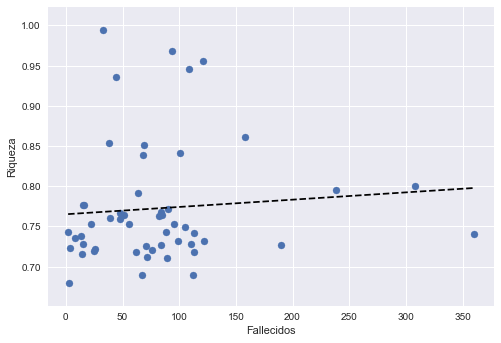

In [26]:
x1 = Final['CANTIDAD_FALLECIDOS']
y1 = Final['HDI']

print(np.corrcoef(x1, y1))

plt.scatter(x1, y1, marker = 'o') 
plt.xlabel('Fallecidos')
plt.ylabel('Riqueza')
plt.plot(np.unique(x1), np.poly1d(np.polyfit(x1, y1, 1))(np.unique(x1)), 'r--',color='BLACK')
plt.show()

[[ 1.          0.47901378]
 [ 0.47901378  1.        ]]


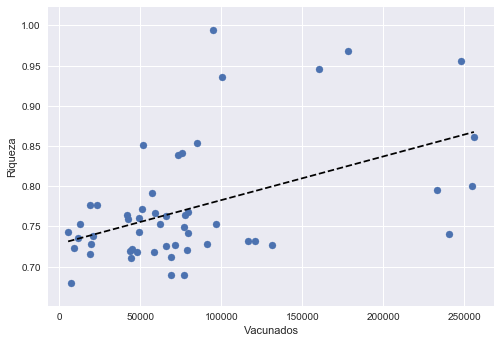

In [27]:
x1 = Final['TOTAL_VACUNADOS']
y1 = Final['HDI']

print(np.corrcoef(x1, y1))

plt.scatter(x1, y1, marker = 'o') 
plt.xlabel('Vacunados')
plt.ylabel('Riqueza')
plt.plot(np.unique(x1), np.poly1d(np.polyfit(x1, y1, 1))(np.unique(x1)), 'r--',color='Black')
plt.show()

In [29]:
model = sm.ols(formula = 'CANTIDAD_FALLECIDOS ~ TOTAL_VACUNADOS + HDI', data = Final).fit()
print(model.params)
print(model.summary())

Intercept          286.839047
TOTAL_VACUNADOS      0.001092
HDI               -380.856984
dtype: float64
                             OLS Regression Results                            
Dep. Variable:     CANTIDAD_FALLECIDOS   R-squared:                       0.812
Model:                             OLS   Adj. R-squared:                  0.805
Method:                  Least Squares   F-statistic:                     106.0
Date:                 Sun, 11 Jul 2021   Prob (F-statistic):           1.60e-18
Time:                         17:15:32   Log-Likelihood:                -250.65
No. Observations:                   52   AIC:                             507.3
Df Residuals:                       49   BIC:                             513.2
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------